# Zad. - filtrowanie dźwięku

In [1]:
import numpy as np
import tempfile
import os
import os.path
import wave
from IPython.display import Audio, display
import matplotlib.pylab as plt
from scipy import stats

In [2]:
import librosa

# Zad.
Proszę 
 * wczytać 
 * odsłuchać 
 * narysować
 
dane z plik  ja1.wav.

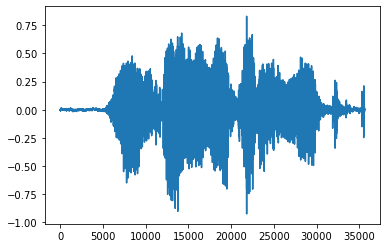

In [3]:
file = 'ja1.wav'

x, fs = librosa.load(file)
plt.plot(x)
plt.show()

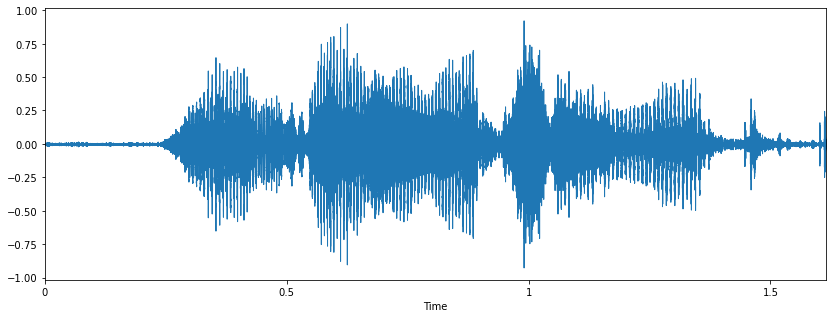

In [4]:
import librosa.display

plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=fs)
plt.show()

In [5]:
import IPython.display as ipd
ipd.Audio(file) # load a local WAV file

In [6]:
ipd.Audio(x, rate=fs) # load a NumPy array

# Zad.
Proszę dokonać transformaty Fouriera. 

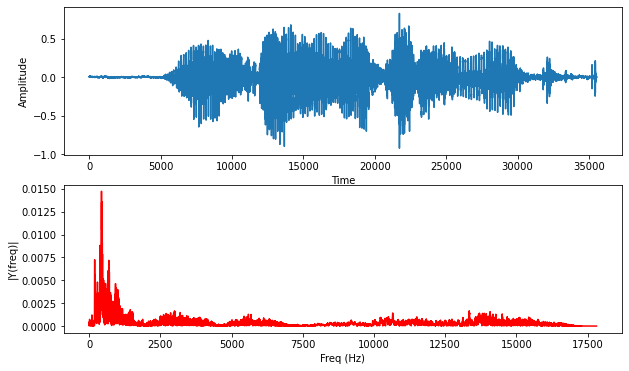

In [7]:
n = len(x) # length of the signal
Y = np.fft.fft(x)/n # fft computing and normalization
z = np.fft.ifft(Y)*n # ifft computing and normalization
frq = np.arange(0,n/2) # one side frequency range
Y = Y[range(np.int(n/2))]

fig, ax = plt.subplots(2, 1,figsize=(10,6))
ax[0].plot(x[100:n])
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Amplitude')
ax[1].plot(frq[0:30000],abs(Y)[0:30000],'r') # plotting the spectrum
ax[1].set_xlabel('Freq (Hz)')
ax[1].set_ylabel('|Y(freq)|')
plt.show()

# Zad.
Proszę 
 * **dodać szum gaussowski** 
 ```python
 stats.norm(0,0.01).rvs(len(x))
 ```
oraz 
 * wczytać 
 * odsłuchać 
 * narysować

In [9]:
x_noise = x + stats.norm(0,0.01).rvs(len(x)) 

In [10]:
ipd.Audio(x_noise, rate=fs) # load a NumPy array

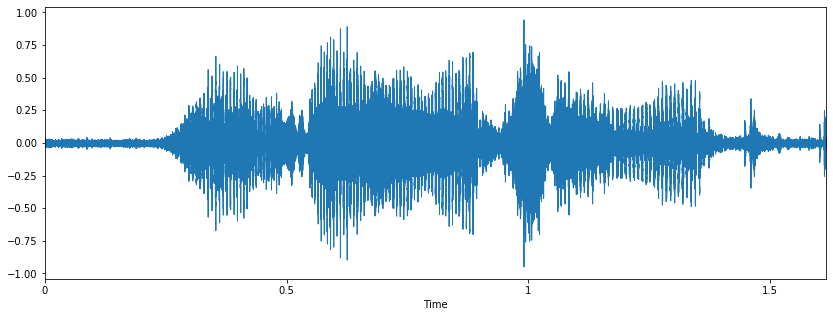

In [10]:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x_noise, sr=fs)
plt.show()

In [11]:
y_noise = x_noise
n = len(y_noise) # length of the signal
Y_noise = np.fft.fft(y_noise)/n # fft computing and normalization

frq = np.arange(0,n/2) # one side frequency range
#Y_noise = Y_noise[range(np.int(n/2))]

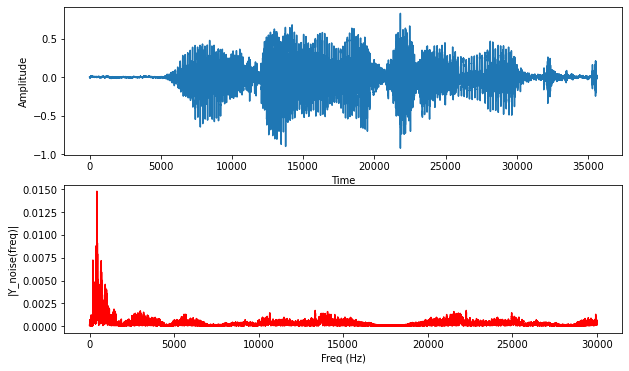

In [12]:
fig, ax = plt.subplots(2, 1,figsize=(10,6))
ax[0].plot(x)
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Amplitude')
ax[1].plot(abs(Y_noise)[0:30000],'r') # plotting the spectrum
ax[1].set_xlabel('Freq (Hz)')
ax[1].set_ylabel('|Y_noise(freq)|')
plt.show()

# Zad.
Proszę dokonać filtrowania przez progowanie w dziedzinie częstotliwości oraz IFFT.

In [13]:
import copy
Y_noise_filter = copy.copy(Y_noise)
Y_noise_filter[Y_noise_filter < 0.0001]=0

y_noise_filter = np.fft.ifft(Y_noise_filter)*n # ifft computing and normalization

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


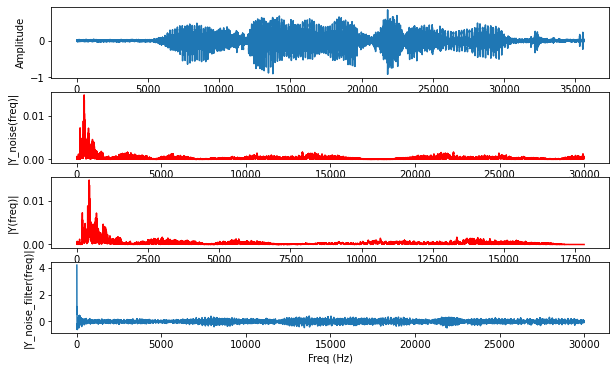

In [14]:
fig, ax = plt.subplots(4, 1,figsize=(10,6))
ax[0].plot(y_noise)
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Amplitude')
ax[1].plot(abs(Y_noise)[0:30000],'r') # plotting the spectrum
ax[1].set_xlabel('Freq (Hz)')
ax[1].set_ylabel('|Y_noise(freq)|')
ax[2].plot(abs(Y)[0:30000],'r') # plotting the spectrum
ax[2].set_xlabel('Freq (Hz)')
ax[2].set_ylabel('|Y(freq)|')
ax[3].plot(y_noise_filter[0:30000]) # plotting the spectrum
ax[3].set_xlabel('Freq (Hz)')
ax[3].set_ylabel('|Y_noise_filter(freq)|')
plt.show()

In [15]:
ipd.Audio(y_noise_filter, rate=fs) # load a NumPy array

C:\ProgramData\Anaconda3\lib\site-packages\IPython\lib\display.py:157: ComplexWarning: Casting complex values to real discards the imaginary part
  data = np.array(data, dtype=float)


# Zad.
Proszę dokonać filtrowania przez średnią ruchomą w dziedzinie częstotliwości oraz IFFT.

In [20]:
import copy
import pandas as pd
Y_noise_filter = copy.copy(Y_noise)

s = pd.Series(Y_noise_filter)
s = s.rolling(3, win_type='parzen').mean()
s.dropna(inplace=True)
print(s.values)

y_noise_filter = np.fft.ifft(s)*n # ifft computing and normalization

[ 8.40015781e-05  1.08767797e-04  6.94923055e-05 ... -2.12358427e-04
  6.94923055e-05  1.08767797e-04]


C:\Users\admin\anaconda3\lib\site-packages\pandas\core\window\rolling.py:272: ComplexWarning: Casting complex values to real discards the imaginary part
  values = ensure_float64(values)


In [21]:
ipd.Audio(y_noise_filter, rate=fs) # load a NumPy array

C:\Users\admin\anaconda3\lib\site-packages\IPython\lib\display.py:158: ComplexWarning: Casting complex values to real discards the imaginary part
  data = np.array(data, dtype=float)
